In [24]:
import numpy as np
import pandas as pd 
import cv2
import os
import matplotlib.pyplot as plt
import math

In [3]:
video_path='Videos'

In [4]:
# test code to play one video 
vide='Videos/0XFC6499D603B9E1E.avi'
cap=cv2.VideoCapture(vide)
while cap.isOpened():
    ret,frame=cap.read()
    cv2.namedWindow('Video', cv2.WINDOW_NORMAL) 
    cv2.resizeWindow('Video', 800, 600)
   # frame=cv2.resize(frame,(540,380),fx=0,fy=0,interpolation=cv2.INTER_CUBIC)
    if not ret:
        break
    cv2.imshow('Video',frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
   


In [5]:
#background subtraction method - test video segmentation
fgbg = cv2.createBackgroundSubtractorMOG2()

In [6]:
# background subtraction 
vide='Videos/0XFC6499D603B9E1E.avi'
cap=cv2.VideoCapture(vide)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    fgmask = fgbg.apply(frame)
    # Display the original frame and the segmented frame
    cv2.imshow('Original Frame', frame)
    cv2.imshow('Segmented Frame', fgmask)
    
    # Exit when 'q' key is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Preprocessing 

In [7]:
# check frame size 
def get_frame_size (videopath):
    cap=cv2.VideoCapture(videopath)
    if not cap.isOpened():
        print('error')
    width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    count=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps=int(cap.get(cv2.CAP_PROP_FPS))
    cap.release()
    return width,height,count,fps

w,h,c,fps=get_frame_size(vide)
print(f'frame size is {w}x{h} and count is {c} with fps equals {fps}')
    


frame size is 112x112 and count is 157 with fps equals 50


In [8]:
#loop to iterate through folder to check frame size for all videos and fps 
for v in os.listdir(video_path):
    if v.endswith('.avi'):
        path=os.path.join(video_path,v)
        w,h,c,fps=get_frame_size(path)
        print(f'frame size is {w}x{h} and count is {c} with fps equals {fps}')
       

frame size is 112x112 and count is 150 with fps equals 50
frame size is 112x112 and count is 181 with fps equals 50
frame size is 112x112 and count is 184 with fps equals 50
frame size is 112x112 and count is 142 with fps equals 50
frame size is 112x112 and count is 107 with fps equals 46
frame size is 112x112 and count is 161 with fps equals 50
frame size is 112x112 and count is 184 with fps equals 50
frame size is 112x112 and count is 181 with fps equals 50
frame size is 112x112 and count is 191 with fps equals 50
frame size is 112x112 and count is 157 with fps equals 50
frame size is 112x112 and count is 268 with fps equals 50
frame size is 112x112 and count is 192 with fps equals 62


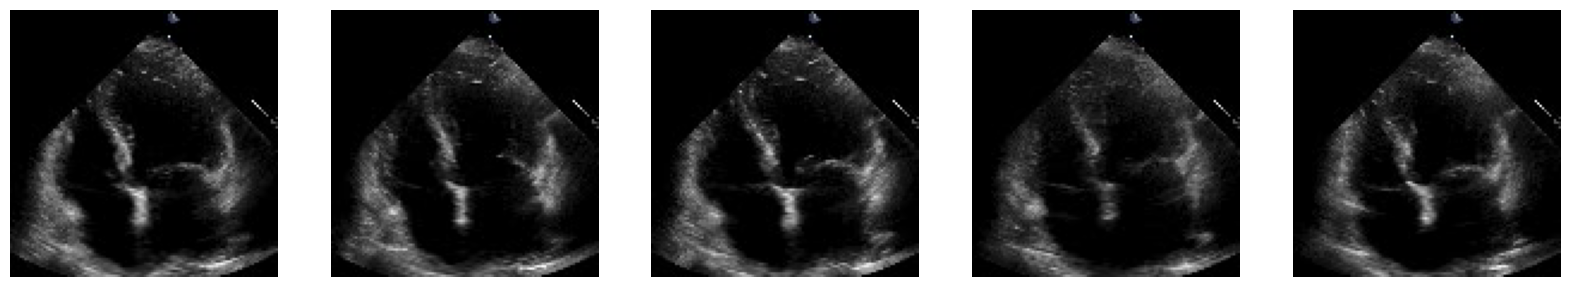

In [36]:
# extract frames from video and visualize these frames # visualize few frames 
def extract_frames(videopath,num_frames=5):
    cap=cv2.VideoCapture(videopath)
    frames=[]
    if not cap.isOpened():
        print('error')

    w=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    h=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    count=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices=[int(i*count/num_frames) for i in range(num_frames)]
    for id in frame_indices:
        if id<count:
            cap.set(cv2.CAP_PROP_POS_FRAMES,id)
            ret,frame=cap.read()
            if not ret:
                break
            frame=cv2.resize(frame,(w,h))
            frames.append(frame)
    cap.release()
    fig,axes=plt.subplots(1,num_frames,figsize=(20,5))
    for i,frame in enumerate(frames):
        axes[i].imshow(frame)
        axes[i].axis('off')
    plt.show()
    return frames

f=extract_frames(vide)


In [45]:
# extract frames from video and visualize these frames
def extract_frames(videopath):
    cap=cv2.VideoCapture(videopath)
    frames=[]
    if not cap.isOpened():
        print('error')
    while True:
        ret,frame=cap.read()
        if not ret:
            break
        w=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        h=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        frame=cv2.resize(frame,(w,h))
        frames.append(frame)
    cap.release()
    return frames
# extract frames
f=extract_frames(vide)
#normalize frames 
def normalize_frames(frames):
    nf=[frame/255.0 for frame in frames]
    return nf

normalized_frames=normalize_frames(f)
# all videos should have same fps 
def pad_or_truncate(frames, max_frames=1002):
    if len(frames) > max_frames:
        return frames[:max_frames]
    else:
        return frames + [frames[-1]] * (max_frames - len(frames))
    
num_of_frames=pad_or_truncate(normalized_frames)



In [46]:
print(len(num_of_frames))

1002


In [32]:
def visualizeframes(frames,framesperrow):
    num_frames=len(frames)
    num_rows = math.ceil(num_frames /framesperrow)
    fig, axes = plt.subplots(num_rows, framesperrow, figsize=(20, num_rows * 4))
    axes = axes.flatten()
    for i,frame in enumerate(frames):
        axes[i].imshow(frame)
        axes[i].axis('off')
    plt.show()
   

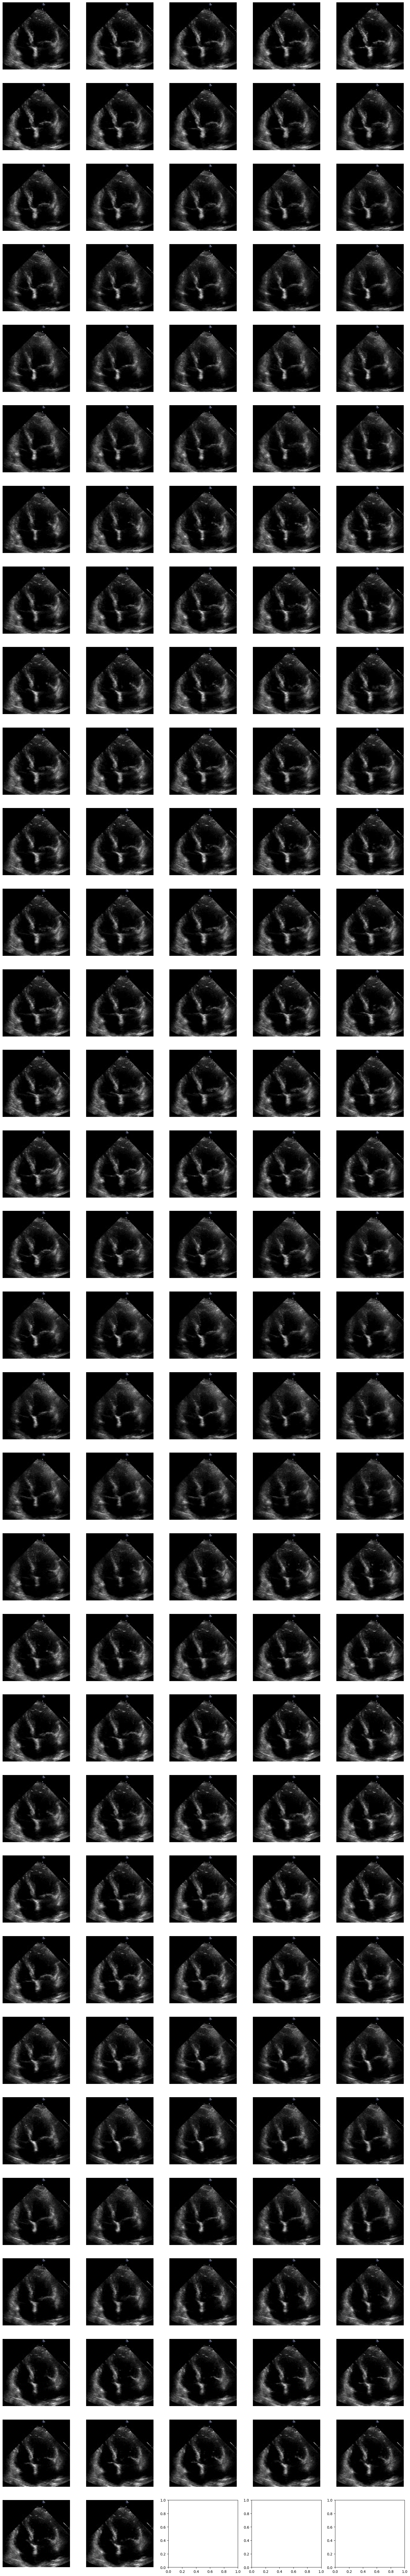

In [34]:
visualizeframes(f,5)

In [22]:
len(f)

5

In [10]:
# to play multiple videos in a folder
flag=0
def play_video(video_path):
    global flag
    cap=cv2.VideoCapture(video_path)
    cv2.namedWindow('Video',cv2.WINDOW_NORMAL)
    cv2.resizeWindow('Video',800,600)
    while cap.isOpened():
        ret,frame=cap.read()
        if not ret:
            break
        cv2.imshow('Video',frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            flag=1
            break
    cap.release()
    cv2.destroyAllWindows()





In [11]:
#loop to iterate through folder
for v in os.listdir(video_path):
    if v.endswith('.avi'):
        path=os.path.join(video_path,v)
        if flag==0:
            print(f'playing {v}')
            play_video(path)
        else:
            print('interrupted')
            break


playing 0XFCDC29AA6B8E83B.avi


interrupted


In [12]:
data=pd.read_csv('FileList.csv')
print(f'size of data is: {len(data)}')

size of data is: 10030


In [13]:
data.head()

FileName         EF         ESV         EDV  FrameHeight  \
0  0X100009310A3BD7FC  78.498406   14.881368   69.210534          112   
1  0X1002E8FBACD08477  59.101988   40.383876   98.742884          112   
2  0X1005D03EED19C65B  62.363798   14.267784   37.909734          112   
3  0X10075961BC11C88E  54.545097   33.143084   72.914210          112   
4  0X10094BA0A028EAC3  24.887742  127.581945  169.855024          112   

   FrameWidth  FPS  NumberOfFrames  Split  
0         112   50             174    VAL  
1         112   50             215  TRAIN  
2         112   50             104  TRAIN  
3         112   55             122  TRAIN  
4         112   52             207    VAL

In [14]:
data.describe()

EF           ESV           EDV   FrameHeight    FrameWidth  \
count  10030.000000  10030.000000  10030.000000  10030.000000  10030.000000   
mean      55.748248     43.427433     91.324572    112.392423    112.547159   
std       12.371483     35.828098     45.663554     16.040604     22.366033   
min        6.907258      4.350710     12.618671    112.000000    112.000000   
25%       51.601387     23.686339     62.166669    112.000000    112.000000   
50%       59.209109     33.596750     82.084190    112.000000    112.000000   
75%       63.958740     49.107316    108.288686    112.000000    112.000000   
max       96.967237    612.489815    695.036025    768.000000   1040.000000   

                FPS  NumberOfFrames  
count  10030.000000    10030.000000  
mean      51.077767      176.533998  
std        6.238707       57.879145  
min       18.000000       28.000000  
25%       50.000000      144.000000  
50%       50.000000      171.000000  
75%       50.000000      201.000000  
max      138.000000     1002.000000

In [15]:
col=['EF','EDV','ESV']
stat1=data.loc[:,col]
statistics=stat1.describe().reset_index()
statistics

index            EF           EDV           ESV
0  count  10030.000000  10030.000000  10030.000000
1   mean     55.748248     91.324572     43.427433
2    std     12.371483     45.663554     35.828098
3    min      6.907258     12.618671      4.350710
4    25%     51.601387     62.166669     23.686339
5    50%     59.209109     82.084190     33.596750
6    75%     63.958740    108.288686     49.107316
7    max     96.967237    695.036025    612.489815

In [16]:
for i,item in data.iterrows():
    file_name=item['FileName']
    v_path=os.path.join(video_path,f'{file_name}.avi')
    if os.path.exists(v_path):
        if flag==0:
            print(f'playing {file_name}')
            play_video(v_path)
        else:
            print('interrupted')
    else:
        print(f'{file_name} not found')

0X100009310A3BD7FC not found
0X1002E8FBACD08477 not found
0X1005D03EED19C65B not found
0X10075961BC11C88E not found
0X10094BA0A028EAC3 not found
0X100CF05D141FF143 not found
0X100E3B8D3280BEC5 not found
0X100E491B3CD58DE2 not found
0X100F044876B98F90 not found
0X101026B90DAE7E95 not found
0X1012703CDC1436FE not found
0X1013E8A4864781B not found
0X1018521A3BC5CDBA not found
0X101C388397F66EDB not found
0X101CFC9C5351DCBE not found
0X101E654AF3FC07A8 not found
0X10267ADF2E644E0 not found
0X102AE9C68B2C46DA not found
0X102C51641C321436 not found
0X102CFB07F752AAE6 not found
0X102DD1B9BE03716 not found
0X102E453603FA1440 not found
0X102E94908346DE1D not found
0X102F3D4CD5E10801 not found
0X10365E52F01510B4 not found
0X1039108E17193B1C not found
0X1039B49145DF4F25 not found
0X103A55B2546EF36E not found
0X103BE163257D663A not found
0X1040C376CF369A01 not found
0X1040D64234D3E916 not found
0X1043D3D352972862 not found
0X1045F1B5A0A5EA54 not found
0X104D2C3D60AE3DE8 not found
0X105039B849CDB1C

In [17]:
volume_tracings=pd.read_csv('VolumeTracings.csv')
volume_tracings.shape

(425010, 6)

In [18]:
volume_tracings.head()

FileName         X1         Y1         X2         Y2  Frame
0  0X100009310A3BD7FC.avi  51.260417  15.348958  64.932292  69.125000     46
1  0X100009310A3BD7FC.avi  50.037611  17.167841  53.367222  16.321330     46
2  0X100009310A3BD7FC.avi  49.157378  20.407629  57.090549  18.390722     46
3  0X100009310A3BD7FC.avi  48.538173  23.581055  59.997339  20.667707     46
4  0X100009310A3BD7FC.avi  47.918968  26.754480  62.904129  22.944693     46